To install binding db, the steps are as follows:
- Install MySQL server from https://dev.mysql.com/downloads/installer/
- I advise to install Workbench as well to have a GUI for creating SQL prompts and looking at data easily: https://dev.mysql.com/downloads/workbench/
- Download the MySQL DB: BDB-mySQL_All_202411_dmp.zip ( 795.92 MB, updated 2024-10-30) from https://www.bindingdb.org/rwd/bind/chemsearch/marvin/Download.jsp
- You should find a readme in the zip file that gives you a list of commands to run to run bind on your machine (I'll put more details on this part later)

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import datetime
try:
    import pymysql
except ImportError:
    import os
    os.system('pip install pymysql')

locale.setlocale(locale.LC_TIME, 'en')

'en'

In [2]:
def connect_with_pymysql():
    try:
        connection = pymysql.connect(
            host='localhost',
            user='root',
            password=json.load(open('keys.json'))['mysql_password'],
            database='bind',
            cursorclass=pymysql.cursors.DictCursor
        )

        return connection
                    
    except pymysql.MySQLError as e:
        print(f"Error: {e}")

In [3]:
connection = connect_with_pymysql()

In [4]:
with connection.cursor() as cursor:
    sql_select = "SELECT month, year, day, title, abstract FROM article"
    cursor.execute(sql_select)
    articles = pd.DataFrame(cursor.fetchall())

In [5]:
connection.close()

In [6]:
# From number 01 to 12 get the month name
month_mapper = {datetime.date(1900, x, 1).strftime('%b'): x for x in range(1, 13)}

In [7]:
articles['month'] = articles['month'].map(month_mapper)

In [8]:
articles['dt'] = pd.to_datetime(articles[['year', 'month', 'day']])

<Axes: >

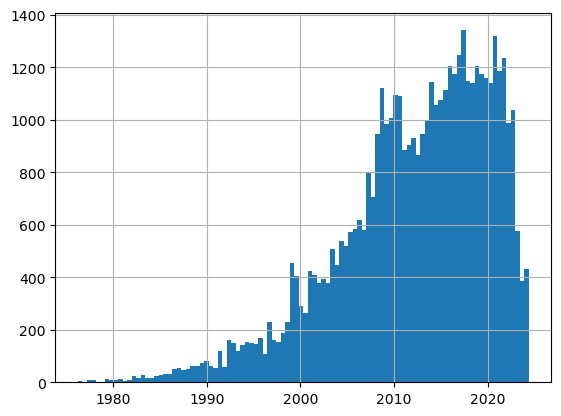

In [9]:
articles['dt'].hist(bins=100)

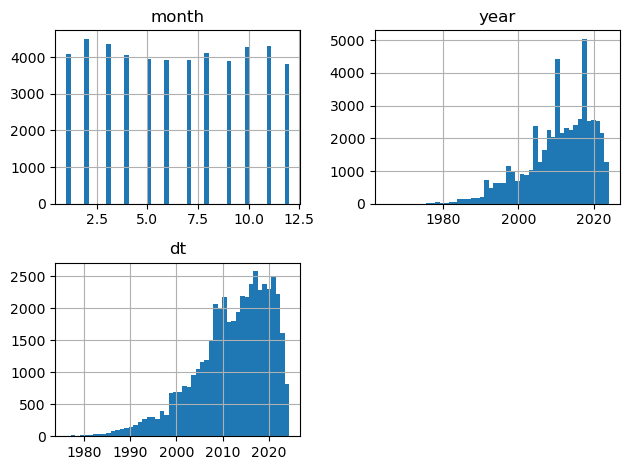

In [10]:
articles.hist(bins=50)
plt.tight_layout()

In [11]:
articles.head()

month    year day                                              title  \
0    1.0  1994.0  26  THERMODYNAMIC AND NMR STUDY OF THE INTERACTION...   
1    5.0  1998.0  26  Energetic roles of hydrogen bonds at the ureid...   
2    3.0  2000.0  07  Thermodynamics of substrate binding to the cha...   
3    5.0  2000.0  26  Compulsory order of substrate binding to herpe...   
4    9.0  1999.0  17  Salt links dominate affinity of antibody HyHEL...   

                                            abstract         dt  
0  Equilibrium constants and standard molar entha... 1994-01-26  
1  The high-affinity streptavidin-biotin complex ... 1998-05-26  
2  The thermodynamics of binding of unfolded poly... 2000-03-07  
3  Isothermal titration calorimetry has been used... 2000-05-26  
4  The binding of murine monoclonal antibody HyHE... 1999-09-17

In [53]:
cancer_articles = articles.where(articles['abstract'].str.lower().str.contains('cancer') | articles['abstract'].str.lower().str.contains('tumor')).dropna()

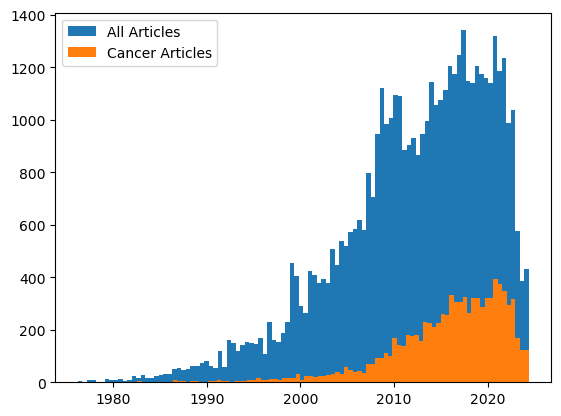

In [54]:
plt.hist(articles['dt'], bins=100, label='All Articles')
plt.hist(cancer_articles['dt'], bins=100, label='Cancer Articles')
plt.legend()
plt.show()

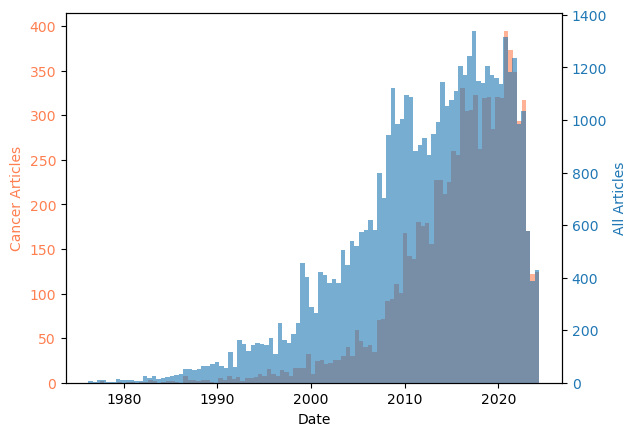

In [55]:
fig, ax1 = plt.subplots() 
  
ax1.hist(cancer_articles['dt'], bins=100, label='Cancer Articles', alpha=0.6, color='coral')
ax1.set_ylabel('Cancer Articles', color = 'coral')
ax1.tick_params(axis ='y', labelcolor = 'coral') 
  
# Adding Twin Axes
ax2 = ax1.twinx() 

ax2.hist(articles['dt'], bins=100, label='All Articles', alpha=0.6, color='tab:blue')
ax2.set_ylabel('All Articles', color = 'tab:blue')
ax2.tick_params(axis ='y', labelcolor = 'tab:blue') 

ax1.set_xlabel('Date')
# Show plot
plt.show()

In [56]:
# Count appearence of each word in all abstracts
from collections import Counter
import re

all_words = ' '.join(articles['abstract'].dropna())
all_words = all_words.split()
all_words = [re.sub(r'\W+', '', words) for words in all_words]
all_words = [words for words in all_words if len(words) > 3]
all_words = Counter(all_words)
all_words = pd.DataFrame(all_words.items(), columns=['word', 'count'])

In [57]:
cancer_words = ' '.join(cancer_articles['abstract'].dropna())
cancer_words = cancer_words.split()
cancer_words = [re.sub(r'\W+', '', words) for words in cancer_words]
cancer_words = [words for words in cancer_words if len(words) > 3]
cancer_words = Counter(cancer_words)
cancer_words = pd.DataFrame(cancer_words.items(), columns=['word', 'count'])

In [58]:
n = 500
first_n_cancer = cancer_words.sort_values('count', ascending=False).head(n)
first_n_all = all_words.sort_values('count', ascending=False).head(n)

In [59]:
diff = set(first_n_cancer['word']) - set(first_n_all['word'])
len(diff)

92

In [67]:
first_n_cancer[first_n_cancer['word'].isin(diff)].head(50)

word  count
670              tumors    836
143           apoptosis    636
503            prostate    596
6357          xenograft    547
3085               lung    530
1075          cytotoxic    498
4757               MCF7    433
1693           leukemia    419
755               types    395
752         progression    383
348            pathways    380
878               cycle    371
440          disclosure    345
267              recent    343
1554           patients    341
5146            tubulin    339
1117          carcinoma    339
435          autoimmune    338
909       transcription    336
1037             trials    334
3441               A549    329
1017           survival    321
695            inhibits    314
1145    phosphorylation    307
1119         metastasis    306
675                PI3K    305
820          implicated    302
1177             immune    299
78          application    297
2878      smallmolecule    295
635               roles    293
669               solid    293
904            estrogen    292
5195             VEGFR2    291
280           Therefore    291
932          regulation    288
394                LSD1    286
436   neurodegenerative    283
632                play    282
808            interest    279
731           functions    278
2786            example    273
3099               cMet    272
6034               IDO1    267
3030        selectively    267
323          mechanisms    267
434             certain    264
667              normal    263
114          especially    260
1076            current    260